<a href="https://colab.research.google.com/github/LokaHarshith/Human_Migration_Analysis/blob/main/Human_Migration_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


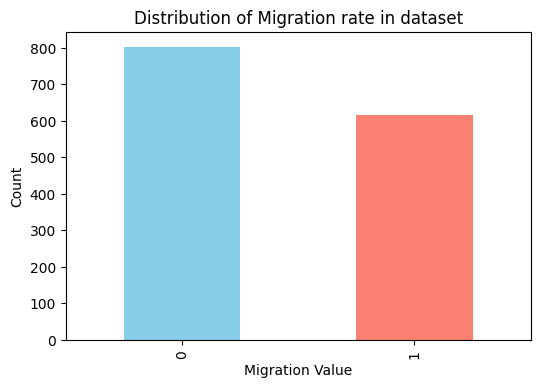

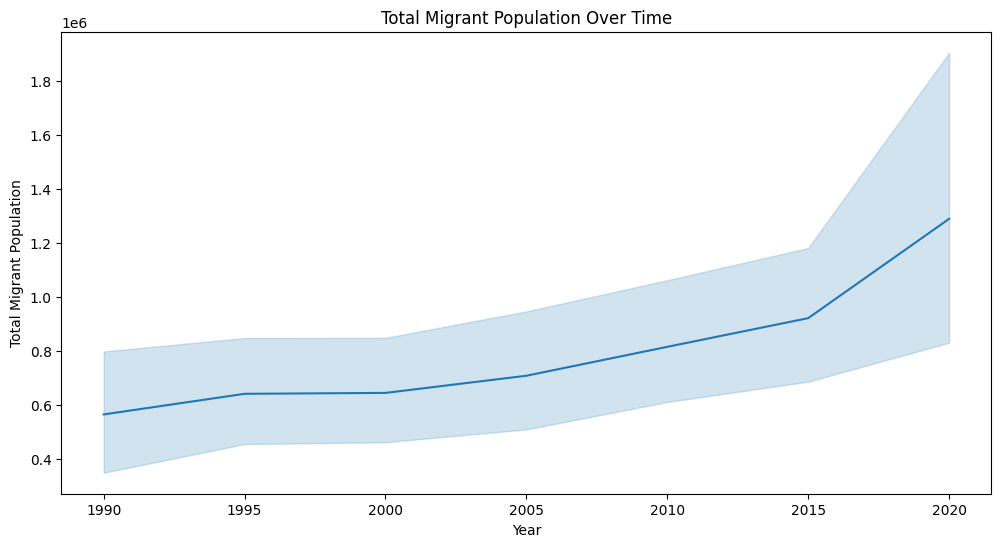

Evaluation of Random Forest model
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,192,9
Actual 1,27,127


Accuracy Score of model : 89.85915492957747
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       201
           1       0.93      0.82      0.88       154

    accuracy                           0.90       355
   macro avg       0.91      0.89      0.90       355
weighted avg       0.90      0.90      0.90       355

Random Sample from X_test:
  year  annual_growth_rate  country_area  population_density  total_country_population  total_migrant_population  migrant_male_population  migrant_female_population  total_fertility_rate  crude_birth_rate  life_expectancy_at_birth  infant_mortality_rate  crude_death_rate
 2015               0.434        510890             133.200                  68067372                   3470220                  1742708                    1727512                 1.525            11.030                    75.630                  7.630             7.220
 2010               0.534          51

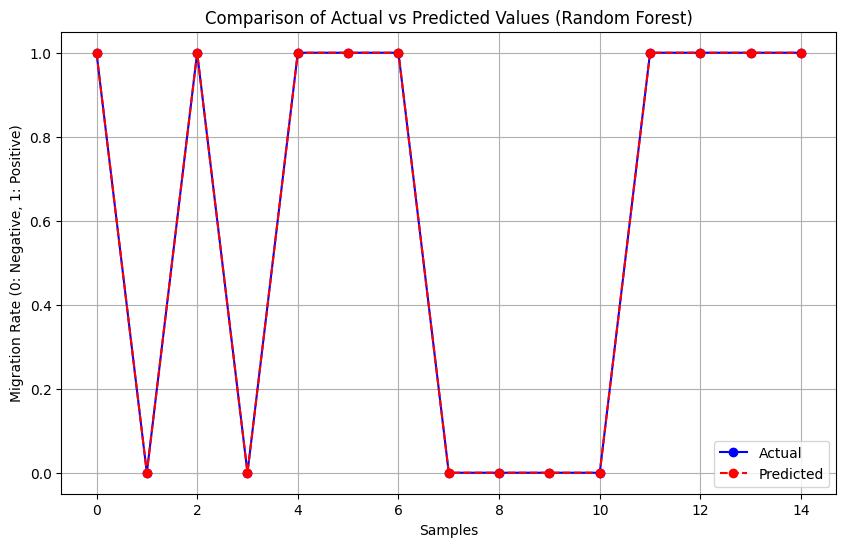

0.22 annual_growth_rate
0.09 infant_mortality_rate
0.09 crude_birth_rate
0.09 life_expectancy_at_birth
0.08 total_fertility_rate
0.07 total_country_population
0.06 migrant_male_population
0.06 migrant_female_population
0.05 population_density
0.05 total_migrant_population
0.05 country_area
0.05 crude_death_rate
0.02 year


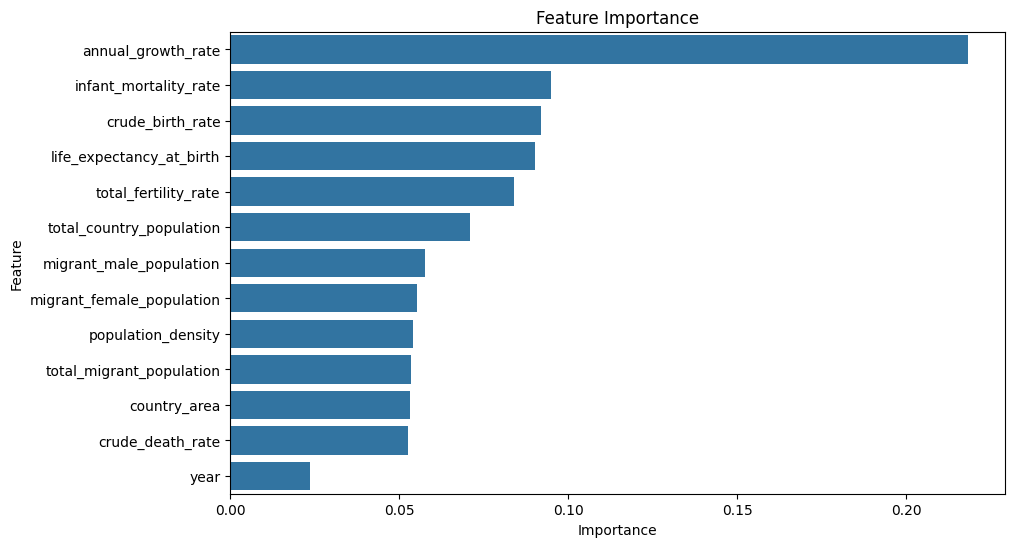

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 0.6355 - accuracy: 0.6720
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6029 - accuracy: 0.6889
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.7086
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.7350
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 0.5235 - accuracy: 0.7538
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4908 - accuracy: 0.7679
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.8017
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4235 - accuracy: 0.8233
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8506
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.8675
Epoch 11/

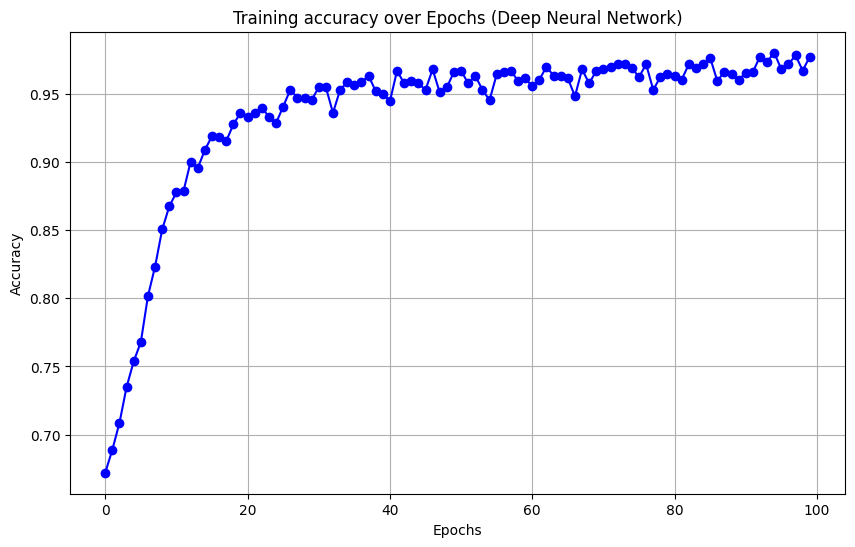

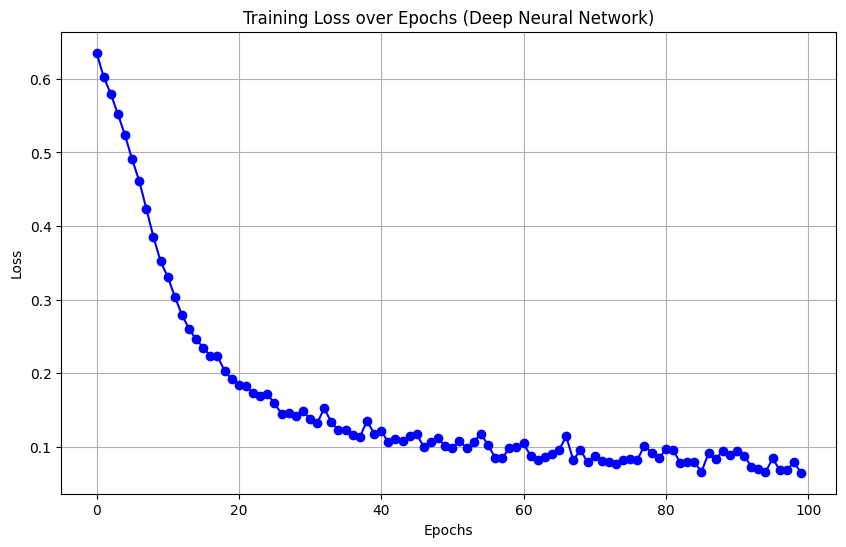

Random Sample from X_test:
  year  annual_growth_rate  country_area  population_density  total_country_population  total_migrant_population  migrant_male_population  migrant_female_population  total_fertility_rate  crude_birth_rate  life_expectancy_at_birth  infant_mortality_rate  crude_death_rate
 2000               0.187           702             153.400                    107719                      3116                     1721                       1395                 3.870            28.320                    68.080                 36.750             5.560
 2020               0.841        653508              86.600                  56599075                     76446                    41898                      34548                 2.070            16.950                    69.330                 34.480             7.150
 2010               3.717        257667               6.300                   1627676                    270829                   158680                     11

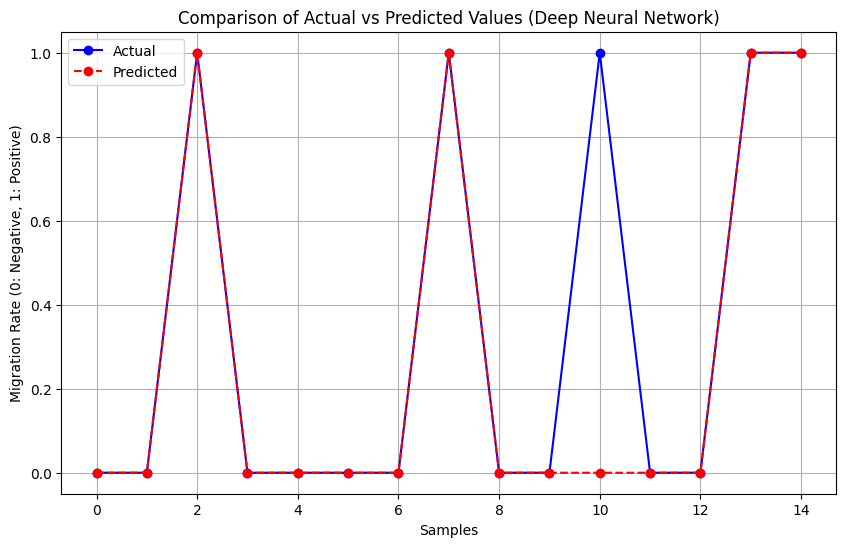

12/12 - 0s - loss: 0.0770 - accuracy: 0.9718 - 57ms/epoch - 5ms/step
Random Forest Accuracy: 0.8985915492957747
Deep Neural Network Accuracy: 0.9718309640884399
The better model is: Deep Neural Network


In [2]:
# -*- coding: utf-8 -*-
"""Migration_Analysis_org.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1jlnr7Da2AJ42mr4_HH5_TJcOBY6Mzsij
"""

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load in the migration_data Dataset
path="/content/migration_Data.csv"
migration_data = pd.read_csv(path)
migration_data.head(10)

migration_data.shape

# Reordering columns
col=["country_id_alpha", "country_name", "year", "annual_growth_rate", "country_area", "population_density", "total_country_population", "total_migrant_population", "migrant_male_population", "migrant_female_population", "total_fertility_rate", "crude_birth_rate", "life_expectancy_at_birth", "infant_mortality_rate", "crude_death_rate", "net_migration_rate", "migration_flag"]
migration_data = migration_data[col]
migration_data.head()

# Convert boolean values of migration_flag value to binary values
migration_data["migration_flag"] = migration_data["migration_flag"].replace({"t": 1, "f": 0})
migration_data.head()

#distribution of the target variable
#used to analyze postive and negative samples distribution
plt.figure(figsize=(6, 4))
migration_data['migration_flag'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Migration rate in dataset')
plt.xlabel('Migration Value')
plt.ylabel('Count')
plt.show()
migration_data['migration_flag'].value_counts()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='total_migrant_population', data=migration_data)
plt.title('Total Migrant Population Over Time')
plt.xlabel('Year')
plt.ylabel('Total Migrant Population')
plt.show()

migration_data.dtypes

X = pd.get_dummies(migration_data.drop(columns=["migration_flag", "country_id_alpha", "country_name",  "net_migration_rate"]))
y = migration_data["migration_flag"]

# To display statistics of X data in readable deciaml format
pd.set_option('display.float_format', lambda x: '%.3f' % x)
X.describe()

# Check the balance of target values
y.value_counts()

# Set a random seed for reproducibility
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

# Split the data into training and tesing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

X_train.sample(5)

y_test

"""Scale the data"""

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

"""Random Forest Classifier model"""

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model using traning data set
random_forest_model = random_forest_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = random_forest_model.predict(X_test_scaled)

predictions

# Calculating the confusion matrix
c_matrix = confusion_matrix(y_test, predictions)
c_matrix_df = pd.DataFrame(c_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Evaluation of Random Forest model")
print("Confusion Matrix")
display(c_matrix_df)

print(f"Accuracy Score of model : {acc_score*100}")

print("Classification Report")
print(classification_report(y_test, predictions))

"""Testing on random samples for prediction evaluation using Random Forest model"""

X_test_df = pd.DataFrame(X_test, columns=X.columns)

#Take random sample from testing dataset
random_sample = X_test_df.sample(15)
print("Random Sample from X_test:\n", random_sample.to_string(index=False))

# Scale the random sample
random_sample_scaled = scaler.transform(random_sample)

# Making predictions for the random sample
prediction = random_forest_model.predict(random_sample_scaled)


original_y_test = y_test[random_sample.index]

# Create a DataFrame to display the actual and predicted values
result_df_rf = pd.DataFrame({
    'Original output': original_y_test,
    'Predicted': prediction
})


# Display the original and predicted values for random sample
print("\n\nActual and Predicted Values on random sample of test data using random forest model:\n", result_df_rf.to_string(index=False))

print("1 indicates positive human migration rate - the number of incoming human migrants greater than outgoing human migrants")
print("0 indicates negative human migration rate - the number of incoming human migrants less than outgoing human migrants")

# Reset the index of result_df_rf
result_df_rf.reset_index(drop=True, inplace=True)

# Plotting the actual vs predicted values for the Random Forest model over samples
plt.figure(figsize=(10, 6))
plt.plot(result_df_rf.index, result_df_rf['Original output'], marker='o', linestyle='-', color='b', label='Actual')
plt.plot(result_df_rf.index, result_df_rf['Predicted'], marker='o', linestyle='--', color='r', label='Predicted')
plt.title('Comparison of Actual vs Predicted Values (Random Forest)')
plt.xlabel('Samples')
plt.ylabel('Migration Rate (0: Negative, 1: Positive)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate feature importance in the Random Forest model.
importances = random_forest_model.feature_importances_
importances

# Sort the features by their importance
sorted_features = sorted(zip(random_forest_model.feature_importances_, X.columns), reverse=True)
for importance, feature in sorted_features:
    print(f"{importance:.2f}", feature)

# Plotting the feature importance for Random Forest model
plt.figure(figsize=(10, 6))
sns.barplot(x=[importance for importance, feature in sorted_features], y=[feature for importance, feature in sorted_features])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

"""Deep Neural Network Model"""

import tensorflow as tf

# Define the deep neural model
number_input_features = len(X_train_scaled[0])
Input_layer_nodes = 16
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 8
hidden_nodes_layer3 = 4

DNN_model = tf.keras.models.Sequential()

# Add the input layer
DNN_model.add(tf.keras.layers.Dense(units=Input_layer_nodes, input_dim=number_input_features, activation="tanh"))

# First hidden layer
DNN_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="tanh"))

# Adding a second hidden layer
DNN_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Adding a third hidden layer
DNN_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
DNN_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
DNN_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
fit_model = DNN_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = DNN_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy*100}")

# Plotting the training accuracy over epochs for Deep Neural Network model
plt.figure(figsize=(10, 6))
plt.plot(fit_model.history['accuracy'], marker='o', linestyle='-', color='b')
plt.title('Training accuracy over Epochs (Deep Neural Network)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plotting the training loss over epochs for Deep Neural Network model
plt.figure(figsize=(10, 6))
plt.plot(fit_model.history['loss'], marker='o', linestyle='-', color='b')
plt.title('Training Loss over Epochs (Deep Neural Network)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

"""Testing on random samples for prediction evaluation using Deep Nueral model"""

X_test_df = pd.DataFrame(X_test, columns=X.columns)

#Take random sample from testing dataset
random_sample = X_test_df.sample(15)
print("Random Sample from X_test:\n", random_sample.to_string(index=False))

# Scale the random sample
random_sample_scaled = scaler.transform(random_sample)

# Making predictions for the random sample
prediction = DNN_model.predict(random_sample_scaled)

#convert the output accuracy using a threshold to binary output
pred_bin = np.where(prediction > 0.5, 1, 0)

original_y_test = y_test[random_sample.index]

# Create a DataFrame to display the actual and predicted values
result_df_dnn = pd.DataFrame({
    'Original Y_test': original_y_test.values.flatten(),
    'Predicted': pred_bin.flatten()
})

# Display the original and predicted values
print("Actual and Predicted Values:\n", result_df_dnn.to_string(index=False))

import matplotlib.pyplot as plt

# Plotting the actual vs predicted values for the Deep Neural Network model
plt.figure(figsize=(10, 6))
plt.plot(result_df_dnn.index, result_df_dnn['Original Y_test'], marker='o', linestyle='-', color='b', label='Actual')
plt.plot(result_df_dnn.index, result_df_dnn['Predicted'], marker='o', linestyle='--', color='r', label='Predicted')
plt.title('Comparison of Actual vs Predicted Values (Deep Neural Network)')
plt.xlabel('Samples')
plt.ylabel('Migration Rate (0: Negative, 1: Positive)')
plt.legend()
plt.grid(True)
plt.show()

# Random Forest Model Accuracy
acc_score_rf = accuracy_score(y_test, predictions)

# Deep Neural Network Model Accuracy
model_loss, acc_score_dnn = DNN_model.evaluate(X_test_scaled, y_test, verbose=2)

# Displaying comparison
print("Random Forest Accuracy:", acc_score_rf)
print("Deep Neural Network Accuracy:", acc_score_dnn)

# Selecting the better model based on accuracy
better_model = "Random Forest" if acc_score_rf > acc_score_dnn else "Deep Neural Network"
print(f"The better model is: {better_model}")